In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.cross_validation import cross_val_predict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import os
# plot feature importance using built-in function
from numpy import loadtxt
from matplotlib import pyplot
%matplotlib inline
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

In [2]:
os.chdir("C://Users//rumer//Desktop//8May2017//DataSet")

In [3]:
df=pd.read_csv("w2.csv")
df.columns

Index([u'anon_screen_name', u'QuzAttmptAvg1', u'QuzCount1', u'QuzAvSco1',
       u'QuzLagMean1', u'LecLag1', u'LecCount1', u'VidActCount1', u'eff1',
       u'QuzAttmptAvg2', u'QuzCount2', u'QuzAvSco2', u'QuzLagMean2',
       u'LecLag2', u'LecCount2', u'VidActCount2', u'eff2', u'Finalgrade',
       u'FinalScore', u'Class', u'EngStatus'],
      dtype='object')

In [4]:
df.head()

,anon_screen_name,QuzAttmptAvg1,QuzCount1,QuzAvSco1,QuzLagMean1,LecLag1,LecCount1,VidActCount1,eff1,Finalgrade,FinalScore,Class,EngStatus
0,012113d6241059a1c191068a899c0396fa3f3ee9,1.500000,25.0,93.750000,540.00,0,0.0,5,0,0.00,Fail,NotEngaged,Time<10Mins
1,01494288a5ff7efce6e88f56eed694345c5d4bff,0.000000,0.0,0.000000,0.00,14423340,12.5,4,0,0.05,Fail,NotEngaged,Time<10Mins
2,02a0c112546f7f05eadaf34efb3548d8702a481f,1.142857,87.5,88.095714,18787782.86,247320,25.0,3,623,0.00,Fail,NotEngaged,Time<10Mins
3,030541f53670bc50fae8964a78cec71bcfd069b0,0.000000,0.0,0.000000,0.00,0,0.0,29,0,0.36,Fail,NotEngaged,Time<10Mins
4,04badfbd3e9dfb420065a6ea7cad05db20fa2a5b,0.000000,0.0,0.000000,0.00,0,0.0,9,0,0.09,Fail,NotEngaged,Time<10Mins


In [18]:
df.drop('Finalgrade',1, inplace=True)
df.drop('EngStatus',1, inplace=True)
df.drop('Class',1,inplace=True)


In [19]:
df.columns

Index([u'anon_screen_name', u'QuzAttmptAvg1', u'QuzCount1', u'QuzAvSco1',
       u'QuzLagMean1', u'LecLag1', u'LecCount1', u'VidActCount1', u'eff1',
       u'FinalScore'],
      dtype='object')

In [24]:
array=df.values
X = array[:,1:9]
y = array[:,9]


In [64]:
#from sklearn.preprocessing import LabelBinarizer
#lb = LabelBinarizer()
#y = np.array([number[0] for number in lb.fit_transform(y)])


In [25]:
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
X=normalizedX

In [26]:
validation_size = 0.20
print("Number of records", len(X))
print("Class Distribuition", df.groupby('FinalScore').size())
#plt.plot(df['ActCount-1'])


('Number of records', 10590)
('Class Distribuition', FinalScore
Fail    9454
Pass    1136
dtype: int64)


In [27]:
seed = 7
X_train, X_test, Y_train, y_test = cross_validation.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [28]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
models=[]
models.append(('LR',LogisticRegression()))
models.append(('DTree', DecisionTreeClassifier()))
#models.append(('LDA',LinearDiscriminaantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
#Evaluate each model
results=[]
names=[]
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)
    # Compare Algorithms

LR: 89.341600 (0.010611)
DTree: 85.528892 (0.009419)
KNN: 88.137628 (0.011568)
CART: 85.528906 (0.010019)
NB: 14.998065 (0.128568)
SVM: 89.341600 (0.010611)


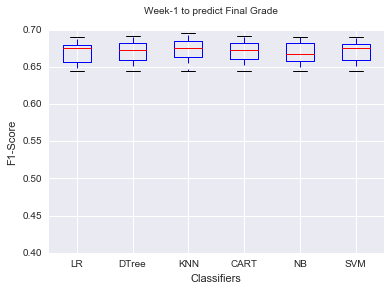

In [69]:
fig = plt.figure()
fig.suptitle('Week-1 to predict Final Grade')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel("F1-Score")
plt.xlabel("Classifiers")
ax.set_xticklabels(names)
plt.show()

In [29]:
# Make predictions on validation dataset
# -*- coding: utf-8 -*-
print("Decision Tree")
LR = DecisionTreeClassifier()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



Decision Tree
0.846081208687
[[1772  113]
 [ 213   20]]
             precision    recall  f1-score   support

       Fail       0.89      0.94      0.92      1885
       Pass       0.15      0.09      0.11       233

avg / total       0.81      0.85      0.83      2118



In [30]:
print("GaussianNB")
LR = GaussianNB()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


GaussianNB
0.111898016997
[[   4 1881]
 [   0  233]]
             precision    recall  f1-score   support

       Fail       1.00      0.00      0.00      1885
       Pass       0.11      1.00      0.20       233

avg / total       0.90      0.11      0.03      2118



In [31]:
print("KNeighbors")
LR = KNeighborsClassifier()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


KNeighbors
0.874881964117
[[1842   43]
 [ 222   11]]
             precision    recall  f1-score   support

       Fail       0.89      0.98      0.93      1885
       Pass       0.20      0.05      0.08       233

avg / total       0.82      0.87      0.84      2118



In [32]:
print("LogisticRegression")
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


LogisticRegression
0.889990557129
[[1885    0]
 [ 233    0]]
             precision    recall  f1-score   support

       Fail       0.89      1.00      0.94      1885
       Pass       0.00      0.00      0.00       233

avg / total       0.79      0.89      0.84      2118



C:\Users\rumer\Downloads\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\sklearn\metrics\classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
print("Support Vector Machine")
LR = SVC()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Support Vector Machine
0.670915958451
[[794  67]
 [630 627]]
             precision    recall  f1-score   support

    Engaged       0.56      0.92      0.69       861
 NotEngaged       0.90      0.50      0.64      1257

avg / total       0.76      0.67      0.66      2118



# RAndom fores t

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.cross_validation
import os
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier


In [2]:
os.chdir("C://Users//rumer//Desktop//8May2017//DataSet")

In [3]:
df=pd.read_csv("W5.csv")
df.columns

Index([u'anon_screen_name', u'QuzAttmptAvg1', u'QuzCount1', u'QuzAvSco1',
       u'QuzLagMean1', u'LecLag1', u'LecCount1', u'VidActCount1', u'eff1',
       u'QuzAttmptAvg2', u'QuzCount2', u'QuzAvSco2', u'QuzLagMean2',
       u'LecLag2', u'LecCount2', u'VidActCount2', u'eff2', u'QuzAttmptAvg3',
       u'QuzCount3', u'QuzAvSco3', u'QuzLagMean3', u'LecLag3', u'LecCount3',
       u'VidActCount3', u'eff3', u'QuzAttmptAvg4', u'QuzCount4', u'QuzAvSco4',
       u'QuzLagMean4', u'LecLag4', u'LecCount4', u'VidActCount4', u'eff4',
       u'QuzAttmptAvg5', u'QuzCount5', u'QuzAvSco5', u'QuzLagMean5',
       u'LecLag5', u'LecCount5', u'VidActCount5', u'eff5', u'Finalgrade',
       u'FinalScore', u'Class', u'EngStatus'],
      dtype='object')

In [4]:
df.drop('Finalgrade',1, inplace=True)
df.drop('EngStatus',1, inplace=True)
df.drop('Class',1,inplace=True)

In [6]:
predictors=df[['QuzAttmptAvg1', 'QuzCount1', 'QuzAvSco1',
       'QuzLagMean1', 'LecLag1', 'LecCount1', 'VidActCount1', 'eff1','QuzAttmptAvg2', 'QuzCount2', 'QuzAvSco2', 'QuzLagMean2',
       'LecLag2', 'LecCount2', 'VidActCount2', 'eff2','QuzAttmptAvg3',
       'QuzCount3', 'QuzAvSco3', 'QuzLagMean3', 'LecLag3', 'LecCount3',
       'VidActCount3', 'eff3','QuzAttmptAvg4', 'QuzCount4', 'QuzAvSco4',
       'QuzLagMean4', 'LecLag4', 'LecCount4', 'VidActCount4', 'eff4','QuzAttmptAvg5', 'QuzCount5', 'QuzAvSco5', 'QuzLagMean5',
       'LecLag5', 'LecCount5', 'VidActCount5', 'eff5']]
X=predictors.as_matrix()

In [7]:
targets=df.FinalScore
Y=np.asarray(targets)

In [8]:
pred_train,pred_test,tar_train,tar_test=train_test_split(predictors,targets,test_size=.4)

In [9]:
pred_train.shape
pred_test.shape
tar_train.shape
tar_test.shape

(4236L,)

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=25)
classifier=classifier.fit(pred_train,tar_train)

In [11]:
predictions=classifier.predict(pred_test)

In [12]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[3709,   51],
       [ 155,  321]])

In [13]:
sklearn.metrics.accuracy_score(tar_test,predictions)

0.95136921624173754

In [14]:
print(classification_report(tar_test,predictions))

             precision    recall  f1-score   support

       Fail       0.96      0.99      0.97      3760
       Pass       0.86      0.67      0.76       476

avg / total       0.95      0.95      0.95      4236



In [15]:
trees=range(25)
accuracy=np.zeros(25)
for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx+1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test,predictions)

In [16]:
plt.cla()
plt.plot(trees,accuracy)
plt.show()

# Feature Importance


In [17]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.cross_validation
import os
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
 # Feature Importance
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [19]:
os.chdir("C://Users//rumer//Desktop//8May2017//DataSet")

In [18]:
d=predictors

In [19]:
targets=df.FinalScore
Y=np.asarray(targets)

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
scores=[]
for val in range(1,41):
    clf=RandomForestClassifier(n_estimators=val)
    Validated=cross_val_score(clf,X,Y,cv=10)
    scores.append(Validated)
type(scores)

list

In [21]:
clf=RandomForestClassifier(n_estimators=25)
clf.fit(X,Y)
imp=clf.feature_importances_
names=d.columns

imp,names=zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center')
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()